## LAB 1 DATA SCIENCE

### 1. Import libraries

In [86]:
import pandas as pd               # data handling
import matplotlib.pyplot as plt   # plotting
import seaborn as sns             # nicer plots

### 2. Load dataset

#### File paths

In [87]:
http_log_path = "http_20250707_0000.log.gz"
conn_log_path = "conn_20250707_0000.log.gz"

#### Load HTTP log

In [88]:
http_df = pd.read_json(http_log_path, lines=True, compression="gzip")

#### Load Conn log

In [89]:
conn_df = pd.read_json(conn_log_path, lines=True, compression="gzip")

### 3. Basic Exploration

#### HTTP Log

In [90]:
print("=== HTTP Log ===")
print(http_df.head())      # first 5 rows
print("Shape:", http_df.shape)
print("Columns:", http_df.columns.tolist())
print("\n")

=== HTTP Log ===
                            ts                 uid        id.orig_h  \
0  2025-07-07T00:00:06.596972Z  CWACBm1G7zF8OV3c6l  192.168.110.109   
1  2025-07-07T00:00:25.847799Z   C1IvuQTriLbdG8HEl  192.168.110.109   
2  2025-07-07T00:00:25.906773Z   C1IvuQTriLbdG8HEl  192.168.110.109   
3  2025-07-07T00:00:31.755894Z  COsrn048sIOy1jZ69k  192.168.110.109   
4  2025-07-07T00:01:09.476267Z  Cf7UNy2VQEURGw0Zy4  192.168.110.106   

   id.orig_p       id.resp_h  id.resp_p  trans_depth method  \
0      49857   150.171.27.11         80            1    GET   
1      49943  118.215.103.18         80            1    GET   
2      49943  118.215.103.18         80            2    GET   
3      49790  118.215.103.18         80            3    GET   
4      64095  149.154.167.41         80            1   POST   

                 host                                                uri  ...  \
0  edge.microsoft.com  /browsernetworktime/time/1/current?cup2key=2:4...  ...   
1   ocsp.digice

#### Conn Log

In [91]:
print("=== Conn Log ===")
print(conn_df.head())
print("Shape:", conn_df.shape)
print("Columns:", conn_df.columns.tolist())

=== Conn Log ===
                            ts                 uid       id.orig_h  id.orig_p  \
0  2025-07-06T23:59:23.226648Z  C41JRf1hXOvgKN6doh  192.168.100.67      58292   
1  2025-07-06T23:59:54.571217Z  CApDtP2S12r94hXAg6  192.168.100.67      43778   
2  2025-07-06T23:59:54.891340Z   CcXdOce8ESk2GeGC3  192.168.100.67      43792   
3  2025-07-06T23:59:50.441054Z  CYQEdk2PfpcURObqY5  192.168.100.10      25200   
4  2025-07-06T23:59:55.431337Z  CbWZsv2H2pT0DTmung  192.168.100.26      53538   

       id.resp_h  id.resp_p proto   duration  orig_bytes  resp_bytes  ...  \
0   103.18.3.114        443   tcp  31.335102         0.0         0.0  ...   
1  203.80.16.244        443   tcp   0.092693         0.0    368450.0  ...   
2  203.80.16.244        443   tcp   0.129504         0.0    368450.0  ...   
3   204.14.183.2         53   udp        NaN         NaN         NaN  ...   
4  17.253.61.202         80   tcp   0.012170         0.0         0.0  ...   

        orig_l2_addr       resp_l

### 4. Visualization idea

#### HTTP Logs

##### a. Top requested hosts

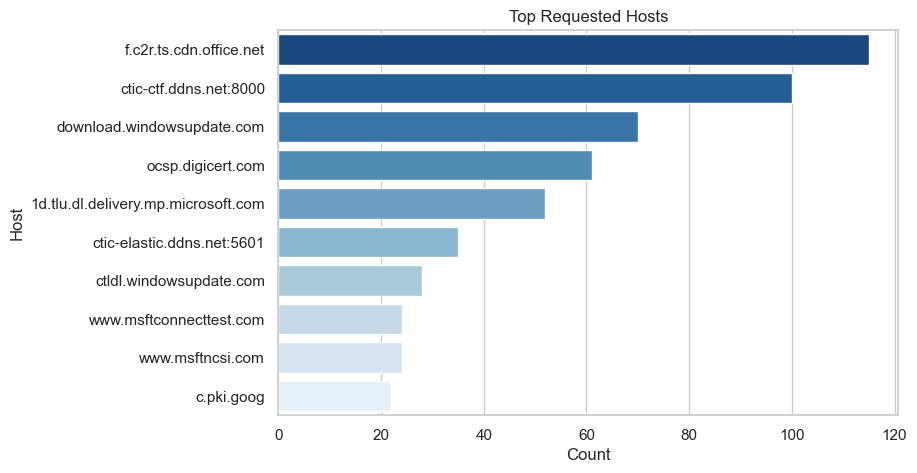

In [92]:
top_hosts = http_df['host'].value_counts().head(10)
plt.figure(figsize=(8,5))
sns.barplot(x=top_hosts.values, y=top_hosts.index, hue=top_hosts.index, palette="Blues_r", legend=False )
plt.title("Top Requested Hosts")
plt.xlabel("Count")
plt.ylabel("Host")
plt.show()

##### b. Top requested URIs

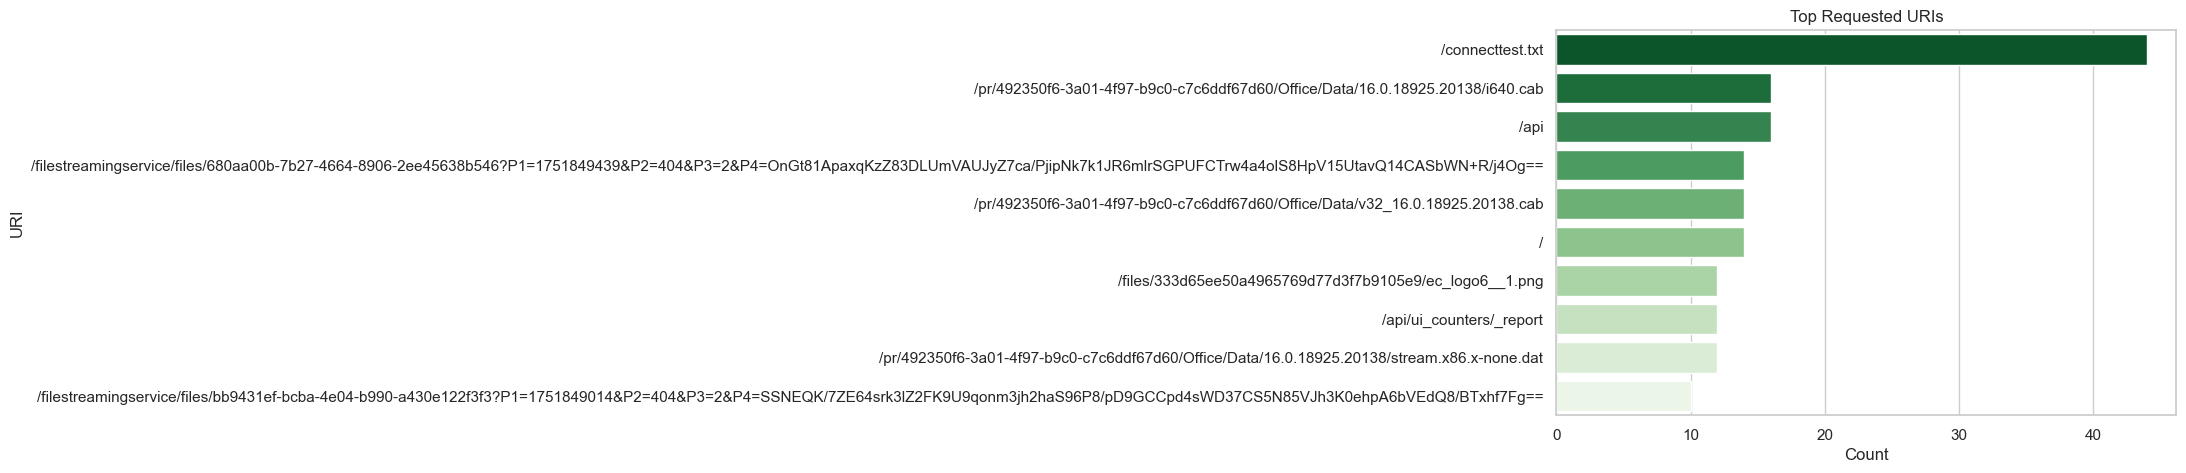

In [93]:
top_uris = http_df['uri'].value_counts().head(10)
plt.figure(figsize=(8,5))
sns.barplot(x=top_uris.values, y=top_uris.index, hue=top_hosts.index, palette="Greens_r", legend=False )
plt.title("Top Requested URIs")
plt.xlabel("Count")
plt.ylabel("URI")
plt.show()

##### c. Request vs Response body size

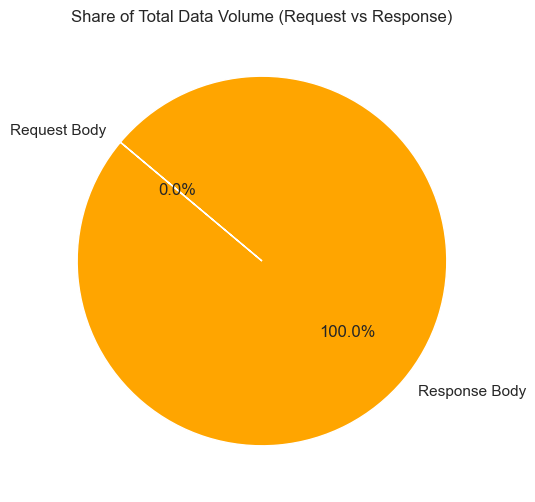

In [94]:
sizes = [
    http_df["request_body_len"].sum(),
    http_df["response_body_len"].sum()
]

labels = ["Request Body", "Response Body"]

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct="%1.1f%%", startangle=140, colors=["skyblue","orange"])
plt.title("Share of Total Data Volume (Request vs Response)")
plt.show()

#### Conn Logs

##### a. Top source IPs

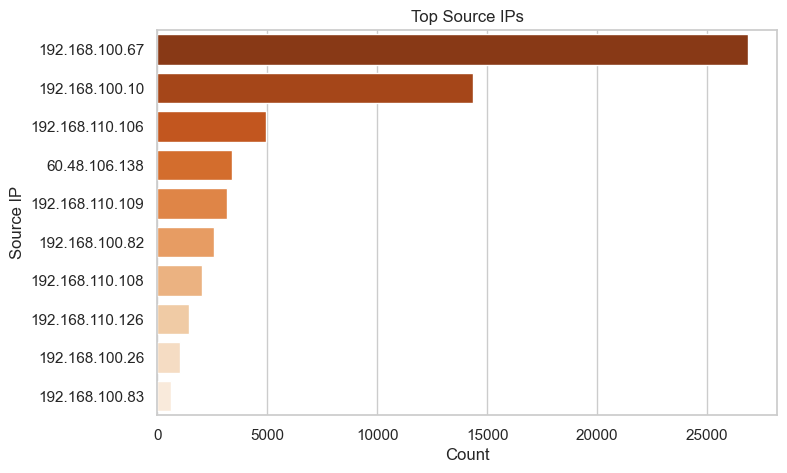

In [95]:
top_src_ips = conn_df['id.orig_h'].value_counts().head(10)
plt.figure(figsize=(8,5))
sns.barplot(x=top_src_ips.values, y=top_src_ips.index, hue=top_hosts.index, palette="Oranges_r",legend=False)
plt.title("Top Source IPs")
plt.xlabel("Count")
plt.ylabel("Source IP")
plt.show()

##### b. Top destination IPs

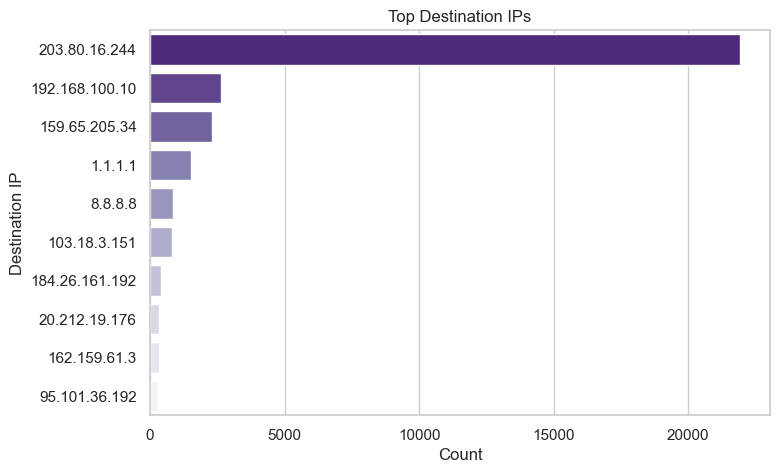

In [96]:
top_dst_ips = conn_df['id.resp_h'].value_counts().head(10)
plt.figure(figsize=(8,5))
sns.barplot(x=top_dst_ips.values, y=top_dst_ips.index, hue=top_hosts.index, palette="Purples_r", legend=False)
plt.title("Top Destination IPs")
plt.xlabel("Count")
plt.ylabel("Destination IP")
plt.show()

##### c. Total Bytes per Destination Port

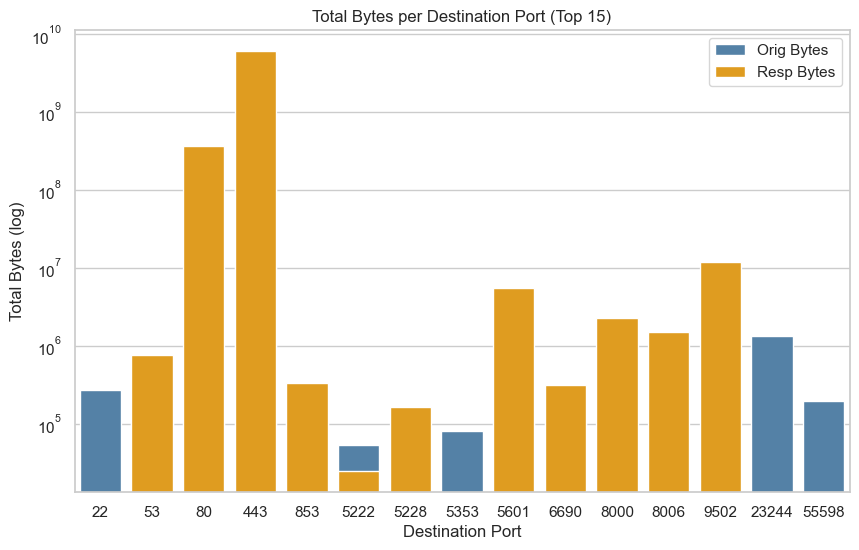

In [97]:
# Group by destination port and sum up total bytes
total_ports = (
    conn_df.groupby("id.resp_p")[["orig_bytes","resp_bytes"]]
    .sum()
    .sort_values("orig_bytes", ascending=False)
    .head(15)
)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=total_ports.index, y=total_ports["orig_bytes"], color="steelblue", label="Orig Bytes")
sns.barplot(x=total_ports.index, y=total_ports["resp_bytes"], color="orange", label="Resp Bytes")
plt.yscale("log")   # log scale helps with very uneven distributions
plt.legend()
plt.title("Total Bytes per Destination Port (Top 15)")
plt.xlabel("Destination Port")
plt.ylabel("Total Bytes (log)")
plt.show()


##### d.Top Destination Hosts by Total Bytes

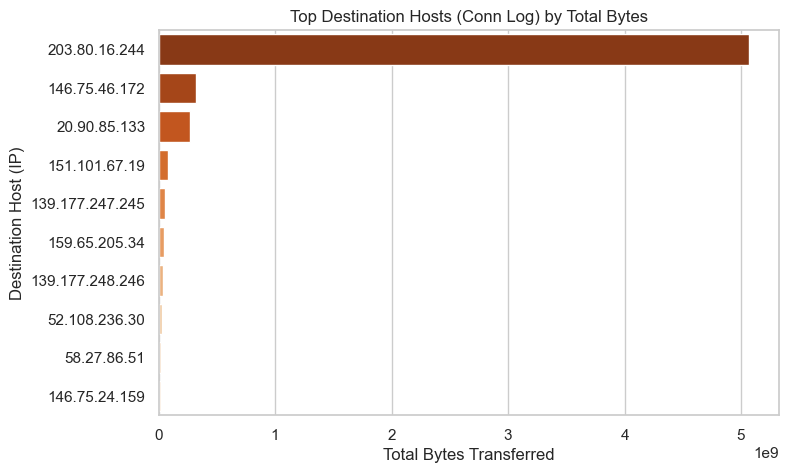

In [98]:
# Calculate total bytes per connection
conn_df["total_bytes"] = conn_df["orig_bytes"] + conn_df["resp_bytes"]

# Top 10 destination IPs (from conn log) by total bytes
top_conn_hosts = (
    conn_df.groupby("id.resp_h")["total_bytes"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(8,5))
sns.barplot(x=top_conn_hosts.values, y=top_conn_hosts.index, hue=top_hosts.index, palette="Oranges_r", legend=False)
plt.title("Top Destination Hosts (Conn Log) by Total Bytes")
plt.xlabel("Total Bytes Transferred")
plt.ylabel("Destination Host (IP)")
plt.show()

#### Merge HTTP + Conn logs

In [99]:
merged = pd.merge(http_df, conn_df, on="uid", suffixes=("_http", "_conn"))

##### a. Top HTTP Hosts: Requests vs Total Bytes

<Figure size 1000x600 with 0 Axes>

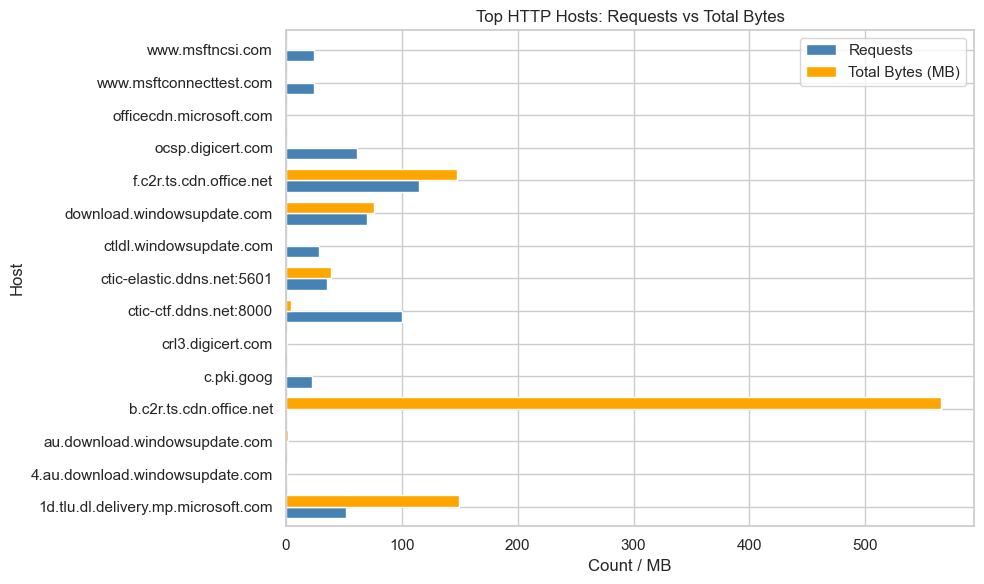

In [100]:
# --- Top 10 Hosts by Request Count ---
top_hosts_count = http_df['host'].value_counts().head(10)

# --- Top 10 Hosts by Total Bytes ---
merged["total_bytes"] = merged["orig_bytes"] + merged["resp_bytes"]
top_hosts_bytes = (
    merged.groupby("host")["total_bytes"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

# --- Merge into one dataframe ---
combined = pd.DataFrame({
    "Requests": top_hosts_count,
    "Total Bytes": top_hosts_bytes
}).fillna(0)  # fill NaN if host is only in one side

# --- Normalize Bytes for easier comparison (optional) ---
# so counts and bytes are comparable in scale
combined["Total Bytes (MB)"] = combined["Total Bytes"] / (1024*1024)

# --- Plot Side-by-Side Bars ---
plt.figure(figsize=(10,6))
combined[["Requests","Total Bytes (MB)"]].plot(
    kind="barh",
    figsize=(10,6),
    width=0.7,
    color=["steelblue","orange"]
)

plt.title("Top HTTP Hosts: Requests vs Total Bytes")
plt.xlabel("Count / MB")
plt.ylabel("Host")
plt.legend(["Requests","Total Bytes (MB)"])
plt.tight_layout()
plt.show()